In [0]:
import pandas as pd
import json
from pandas.io.json import json_normalize  
from google.colab import drive
import datetime
drive.mount('/content/gdrive/',force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report

In [0]:
df = pd.read_csv("gdrive/My Drive/Colab Notebooks/merged.csv")

In [0]:
df.tail()

,Unnamed: 0,windspeedKmph_A,DewPointC_A,cloudcover_A,precipMM_A,pressure_A,WindGustKmph_A,visibility_A,tempC_A,WindChillC_A,winddirDegree_A,humidity_A,date_A,airport_A,itime_A,windspeedKmph_D,DewPointC_D,cloudcover_D,precipMM_D,pressure_D,WindGustKmph_D,visibility_D,tempC_D,WindChillC_D,winddirDegree_D,humidity_D,date_D,airport_D,itime_D,Year,Quarter,Month,DayofMonth,FlightDate,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15,round_Dtime,round_Atime,A_date
1780885,4980150,2,11,79,0.0,1020,4,10,11,11,194,97,2017-12-31,SFO,2300.0,18,-19,12,0.0,1026,21,10,-10,-18,320,48,2017-12-31,EWR,1900.0,2017,4,12,31,2017-12-31,EWR,SFO,1920,1931.0,11.0,0.0,2253,2258.0,5.0,0.0,1900,2300,2017-12-31
1780886,4980151,2,11,79,0.0,1020,4,10,11,11,194,97,2017-12-31,SFO,2300.0,25,-18,31,0.0,1026,31,10,-10,-19,319,56,2017-12-31,JFK,1900.0,2017,4,12,31,2017-12-31,JFK,SFO,1925,2055.0,90.0,1.0,2326,16.0,50.0,1.0,1900,2300,2017-12-31
1780887,4980152,2,11,79,0.0,1020,4,10,11,11,194,97,2017-12-31,SFO,2300.0,4,15,26,0.0,1021,16,10,20,20,118,74,2017-12-31,MIA,2000.0,2017,4,12,31,2017-12-31,MIA,SFO,1950,1948.0,0.0,0.0,2322,2309.0,0.0,0.0,2000,2300,2017-12-31
1780888,4980153,2,11,79,0.0,1020,4,10,11,11,194,97,2017-12-31,SFO,2300.0,4,-5,36,0.0,1019,6,10,15,15,14,26,2017-12-31,PHX,2200.0,2017,4,12,31,2017-12-31,PHX,SFO,2140,2139.0,0.0,0.0,2254,2243.0,0.0,0.0,2200,2300,2017-12-31
1780889,4980154,2,11,79,0.0,1020,4,10,11,11,194,97,2017-12-31,SFO,2300.0,11,0,24,0.0,1024,12,10,2,0,18,90,2017-12-31,SEA,2100.0,2017,4,12,31,2017-12-31,SEA,SFO,2055,2049.0,0.0,0.0,2313,2250.0,0.0,0.0,2100,2300,2017-12-31


In [0]:
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df[categorical_cols].head(10)

,date_A,airport_A,date_D,airport_D,FlightDate,Origin,Dest,A_date
0,0,0,0,2,0,2,0,1
1,0,0,0,3,0,3,0,1
2,0,0,0,4,0,4,0,1
3,0,0,0,14,0,14,0,1
4,0,0,0,2,0,2,0,1
5,0,0,0,2,0,2,0,1
6,0,0,0,2,0,2,0,0
7,0,0,0,7,0,7,0,1
8,0,0,0,8,0,8,0,1
9,0,0,0,8,0,8,0,1


Unnamed: 0         1780890
windspeedKmph_A    1780890
DewPointC_A        1780890
cloudcover_A       1780890
precipMM_A         1780890
pressure_A         1780890
WindGustKmph_A     1780890
visibility_A       1780890
tempC_A            1780890
WindChillC_A       1780890
winddirDegree_A    1780890
humidity_A         1780890
date_A             1780890
airport_A          1780890
itime_A            1780890
windspeedKmph_D    1780890
DewPointC_D        1780890
cloudcover_D       1780890
precipMM_D         1780890
pressure_D         1780890
WindGustKmph_D     1780890
visibility_D       1780890
tempC_D            1780890
WindChillC_D       1780890
winddirDegree_D    1780890
humidity_D         1780890
date_D             1780890
airport_D          1780890
itime_D            1780890
Year               1780890
Quarter            1780890
Month              1780890
DayofMonth         1780890
FlightDate         1780890
Origin             1780890
Dest               1780890
CRSDepTime         1780890
D

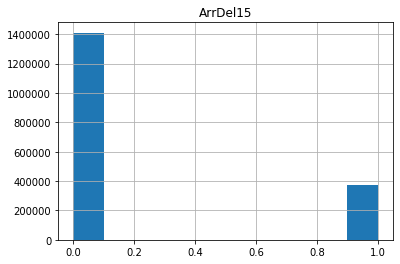

In [0]:
import matplotlib.pyplot as plt
df.hist(column='ArrDel15')

df[df.ArrDel15 == 1].count()
df.count()

In [0]:
y = np.array(df['ArrDel15'])
df = df.drop(['Unnamed: 0','ArrDel15','ArrTime','ArrDelayMinutes','CRSArrTime','round_Atime','round_Dtime', 'DepTime','A_date','itime_A','itime_D','FlightDate'],axis=1)
X = np.array(df)

In [0]:
df.columns

Index(['windspeedKmph_A', 'DewPointC_A', 'cloudcover_A', 'precipMM_A',
       'pressure_A', 'WindGustKmph_A', 'visibility_A', 'tempC_A',
       'WindChillC_A', 'winddirDegree_A', 'humidity_A', 'date_A', 'airport_A',
       'windspeedKmph_D', 'DewPointC_D', 'cloudcover_D', 'precipMM_D',
       'pressure_D', 'WindGustKmph_D', 'visibility_D', 'tempC_D',
       'WindChillC_D', 'winddirDegree_D', 'humidity_D', 'date_D', 'airport_D',
       'Year', 'Quarter', 'Month', 'DayofMonth', 'Origin', 'Dest',
       'CRSDepTime', 'DepDelayMinutes', 'DepDel15'],
      dtype='object')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [0]:

from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

predictions = logisticRegr.predict(X_test)
print(classification_report(y_test, predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    281959
         1.0       0.89      0.68      0.77     74219

    accuracy                           0.92    356178
   macro avg       0.91      0.83      0.86    356178
weighted avg       0.91      0.92      0.91    356178



In [0]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

NameError: ignored

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92    281959
         1.0       0.69      0.71      0.70     74219

    accuracy                           0.87    356178
   macro avg       0.80      0.81      0.81    356178
weighted avg       0.87      0.87      0.87    356178



In [0]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94    281959
         1.0       0.79      0.75      0.77     74219

    accuracy                           0.91    356178
   macro avg       0.86      0.85      0.86    356178
weighted avg       0.91      0.91      0.91    356178



In [0]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    281959
         1.0       0.89      0.69      0.78     74219

    accuracy                           0.92    356178
   macro avg       0.91      0.83      0.86    356178
weighted avg       0.92      0.92      0.91    356178



# Resampling

###Under-Sampling using Tomek Links

In [0]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_tl, y_tl)

predictions = logisticRegr.predict(X_test)
print(classification_report(y_test, predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95    281959
         1.0       0.88      0.69      0.77     74219

    accuracy                           0.92    356178
   macro avg       0.90      0.83      0.86    356178
weighted avg       0.91      0.92      0.91    356178



In [0]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_tl, y_tl)

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92    281959
         1.0       0.67      0.72      0.70     74219

    accuracy                           0.87    356178
   macro avg       0.80      0.81      0.81    356178
weighted avg       0.87      0.87      0.87    356178



In [0]:

clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf = clf.fit(X_tl, y_tl)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94    281959
         1.0       0.78      0.76      0.77     74219

    accuracy                           0.91    356178
   macro avg       0.86      0.85      0.86    356178
weighted avg       0.91      0.91      0.91    356178



In [0]:

clf = GradientBoostingClassifier()
clf = clf.fit(X_tl, y_tl)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    281959
         1.0       0.88      0.69      0.78     74219

    accuracy                           0.92    356178
   macro avg       0.90      0.84      0.86    356178
weighted avg       0.92      0.92      0.91    356178



##Over-sampling using Smote

In [0]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_sm, y_sm)

predictions = logisticRegr.predict(X_test)
print(classification_report(y_test, predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93    281959
         1.0       0.74      0.78      0.76     74219

    accuracy                           0.90    356178
   macro avg       0.84      0.85      0.85    356178
weighted avg       0.90      0.90      0.90    356178



In [0]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_sm, y_sm)

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92    281959
         1.0       0.68      0.71      0.69     74219

    accuracy                           0.87    356178
   macro avg       0.80      0.81      0.80    356178
weighted avg       0.87      0.87      0.87    356178



In [0]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf = clf.fit(X_sm, y_sm)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94    281959
         1.0       0.77      0.77      0.77     74219

    accuracy                           0.90    356178
   macro avg       0.85      0.85      0.85    356178
weighted avg       0.90      0.90      0.90    356178



In [0]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf = clf.fit(X_sm, y_sm)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95    281959
         1.0       0.83      0.73      0.78     74219

    accuracy                           0.91    356178
   macro avg       0.88      0.85      0.86    356178
weighted avg       0.91      0.91      0.91    356178

